In [416]:
import pandas
import numpy
import matplotlib
import seaborn
import plotly.express

# Exercice:
Vous allez travailler sur la base de olympics.csv. Cette base contient les résultats des jeux olympiques entre 1896 et 2008 par nation et discipline notamment.

### Pour les utilisateurs de colab ne pas oubier de charger la base de données avec:

from google.colab import files

uploaded = files.upload()

In [417]:
data = pandas.read_csv("olympics.csv", sep="\t")
data

,City,Year,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,Country,Int Olympic Committee code
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold,Hungary,HUN
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver,Austria,AUT
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze,Greece,GRE
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold,Greece,GRE
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver,Greece,GRE
...,...,...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver,Germany,GER
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze,Lithuania,LTU
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze,Armenia,ARM
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold,Cuba,CUB


En utilisant les différents outils vus lors des deux dernières manipulations et éventuellement les aides en ligne de seaborn pour d'autres types de représentations, représentez graphiquement les données cette base. Vous chercherez à représenter des données significatives de la base et vous ferez en sorte de proposer des figures qui se suffisent à elles-même (titres, légendes, couleurs, taille des fonts...)

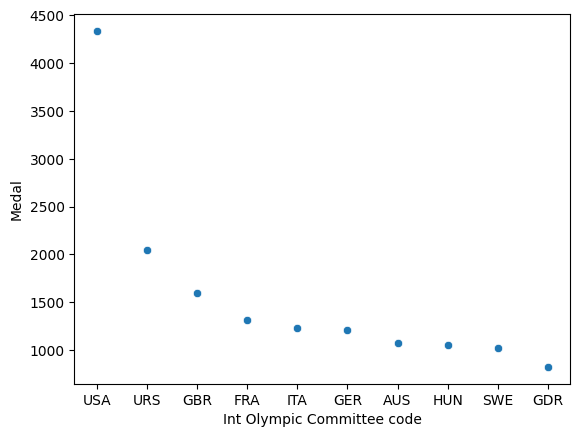

In [418]:
# Somme des médailles par pays
group_per_country = (data.groupby(['Int Olympic Committee code']).count())

# Filtrez uniquement les colonnes avec lesquelles nous allons travailler.
filter = group_per_country.drop(group_per_country.columns[0:9], axis='columns').reset_index()
medal_per_country = filter.drop(filter.columns[2], axis='columns')

# Mettre les données par ordre décroissant et sélectionner les 10 pays ayant le plus de médailles.
medal_per_country = medal_per_country.sort_values(by='Medal', ascending=False)
medal_per_country = medal_per_country[0:10]

# Créer le tableau du total de médailles par pays 
medal_per_country = seaborn.scatterplot(x = medal_per_country['Int Olympic Committee code'], y=medal_per_country['Medal'])

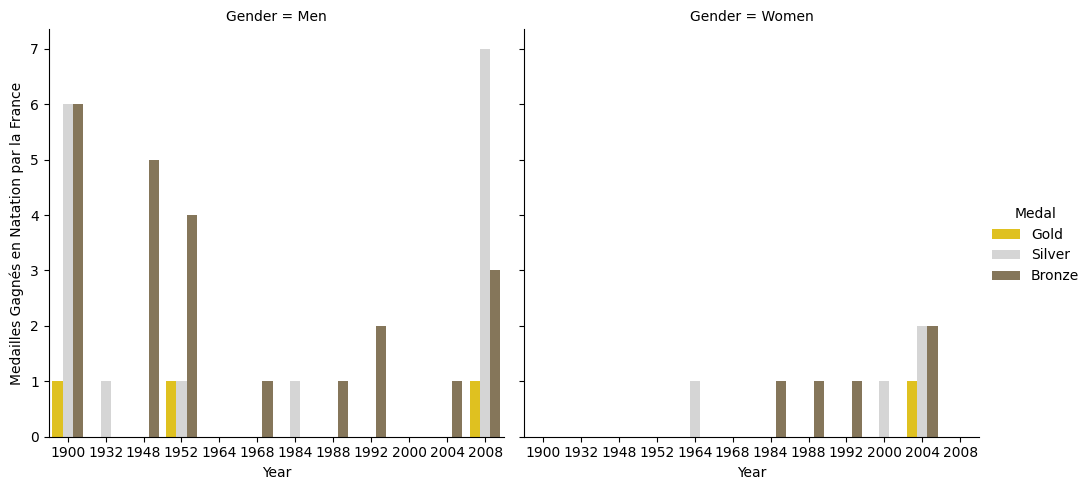

In [419]:
# Renvoie un cadre de données avec uniquement la Discipline de Natation ('Discipline' == 'Swimming').
filter_swimming = data[data['Discipline']=='Swimming']

# Filtrez uniquement les colonnes avec lesquelles nous allons travailler.
filter_swimming = filter_swimming[["Discipline", "Int Olympic Committee code", "Year", "Medal", "Gender"]]

# Nous ne prenons que les lignes où le Int Olympic Committee code est la France ("Int Olympic Committee code" == "FRA").
filtered_df = filter_swimming[filter_swimming['Int Olympic Committee code']==("FRA")]

# Créer le tableau des médailles avec la différence de genre.
fig1 = seaborn.catplot(x = "Year", data=filtered_df, kind='count', col='Gender', hue='Medal', hue_order=['Gold','Silver','Bronze'], palette=seaborn.color_palette(['#ffd700','#d5d5d5','#8C7853'],3))

fig1.set_ylabels('Medailles Gagnés en Natation par la France');

In [420]:
# Compte le nombre de sports présents par an
def count_sport(x):
    return data[data['Year']==x]['Sport'].nunique()

In [430]:
# List Comprehension séparant en tableaux avec l'année et le nombre de sports présents cette année-là
sport_year = numpy.array([[i, count_sport(i)] for i in data['Year'].unique()])

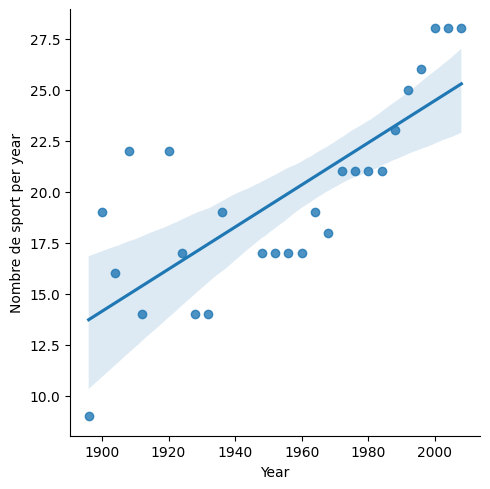

In [432]:
# Dataframe de la list et tracé du graphique de régression
sport_year_df = pandas.DataFrame(sport_year, columns=['Year', 'Nombre de sport per year'])

fig1 = seaborn.lmplot(data=sport_year_df, x='Year', y='Nombre de sport per year')

In [433]:
# BONUS: Nombre de médailles par pays visibles sur la carte du monde à l'aide de la bibliothèque plotly.express

medalhas = data.pivot_table(index='NOC', values='Medal', aggfunc='count').reset_index()

fig = plotly.express.choropleth(medalhas, locations='NOC', color='Medal', color_continuous_scale="Viridis", range_color=(0, medalhas['Medal'].max()))
fig.show()